<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [28]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [29]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Original Image Shape: (100, 100, 3)
Single Channel Image Shape: (100, 100)


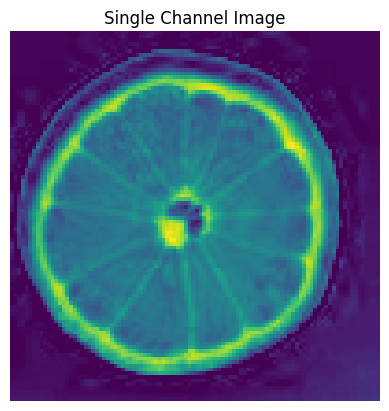

In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = np.array(Image.open('../../Images/lemon.jpeg'))

# Print the shape of the image
print("Original Image Shape:", image.shape)

# Create a new variable img_single_channel that is equivalent to the last color channel of image
img_single_channel = image[:, :, -1]

# Print the shape of img_single_channel to check that it has the same number of pixels as the original image
print("Single Channel Image Shape:", img_single_channel.shape)

# Use plt.imshow to plot img_single_channel
plt.imshow(img_single_channel)  # Assuming the single channel is grayscale
plt.title("Single Channel Image")
plt.axis('off')
plt.show()


## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Average Channel Image Shape: (100, 100)


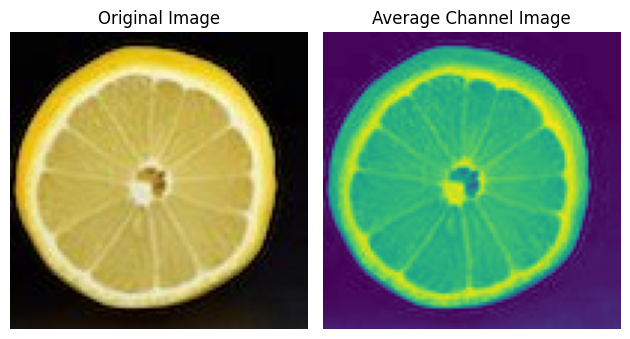

In [31]:
# Create a new variable img_average_channel that is equivalent to the average of all three color channels of image
img_average_channel = np.mean(image, axis=2)  # Compute the average along the color channels axis

# Print the shape of img_average_channel to check that it has the same number of pixels as the original image
print("Average Channel Image Shape:", img_average_channel.shape)

# Use plt.imshow to plot the original image and used subplot to show the images side by side and only showing image withput axis
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Use plt.imshow to plot img_average_channel
plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)  # Display the average channel
plt.title("Average Channel Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## Comments of above images
1. I think the original image shows all the colours of the image 
2. In the average channel image it shows the contrast in the image nad luminance
3. I think the original image is better as it shows the quality of the object and we can tell by looking at it, however, it is not same in the other.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [32]:
# Assuming img_average_channel is a NumPy array with shape (rows, columns)
rows, columns = img_average_channel.shape

# Create an identity matrix of the same size as img_average_channel
identity_matrix = np.eye(rows, columns)

# Print a random row from identity_matrix
# Used chatGpt here to know how to print a randow row out of identity_matrix
random_row_index = np.random.randint(0, rows)
random_row = identity_matrix[random_row_index, :]

print("Identity Matrix:")
print(identity_matrix)
print("\nRandom Row from Identity Matrix:")
print(random_row)

Identity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Observation from above
1. Identity matrix is a square matrix in which all the elements are zero except the diagonal elements which will be one
2. Multiplying any matrix with the identity matrix will not change the original matrix, however, the constraint here is the dimensions should match either the matrix should be square or the row size of the matrix should match the column size of the identity matrix.
3. Printed a randow row from the identity matrix 

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [33]:
# Assuming img_average_channel is a NumPy array
num_rows = img_average_channel.shape[0]

# Create an array containing row indices
rows = np.arange(num_rows)

# Shuffle the row indices
np.random.shuffle(rows)

# Print the shuffled row indices
print("Shuffled Row Indices:")
print(rows)

Shuffled Row Indices:
[71  3 89 69  9 18 25 54 29 51 20  6 10 13 52 74 31 21 14 88 75 86 70 40
 87 48  4 78 15 46 77  0 23 97 27 98 32 24 16 80 39 92 76 59 12 67 93  5
 90  7 95 43 82 37 81 72 50 44 55 19 47 53 28 85 62 26 84 79 73  1 61 42
 94 83 34 22 91 30 57 38 68 49  2 36 64 96 58 63 35 17 99 45 65 56 33 66
 60  8 11 41]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [34]:
# Create a new matrix T from identity_matrix with shuffled rows
T = identity_matrix[rows]

# Check the shape of T
print("Shape of T:",T.shape)

# If needed, reshape T to have the same size as identity_matrix and img_average_channel
# Used chatGpt to know how to reshape the T matrix to have the same size of the img_average_channel
if T.shape != identity_matrix.shape:
    T = T.reshape(identity_matrix.shape)

# Sanity check: Ensure that T has the same size as identity_matrix and img_average_channel
#  Used CHatGpt here to sanity check
assert T.shape == identity_matrix.shape == img_average_channel.shape

print("Shape of T after reshaping:",T.shape)

Shape of T: (100, 100)
Shape of T after reshaping: (100, 100)


## Matrix 'T'
1. T is a matrix but with shuffled rows of identity matrix
2. Each row of the T matrix has the value one and remaining all zero, however, the positions of one's are not same as identity matrix 

## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


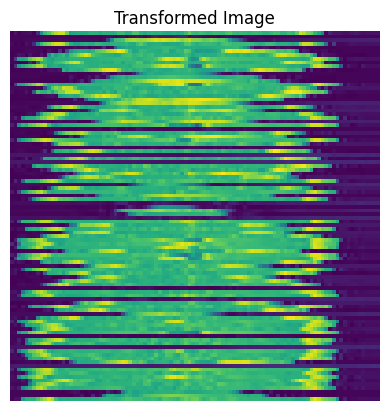

In [35]:
# Perform matrix multiplication between T and img_average_channel
transformed_image = T.dot(img_average_channel)

# Check the shape of the result
print("Shape of transformed_image:",transformed_image.shape)

# Plot the transformed_image
plt.imshow(transformed_image)  # Assuming it's a grayscale image
plt.title("Transformed Image")
plt.axis('off')
plt.show()

## Transformation
1. Here in the transformation as the T matrix has the shuffles rows of the identity matrix, each dot product of row of T matrix and column of the img_average_channel gives a result of different pattern based on the values of T.
2. So, the resultant image pattern is the transformaed image when we multiply the T matrix with the img_average_channel based on the values of T.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Matrix T is a square matrix.
Matrix T is invertible.


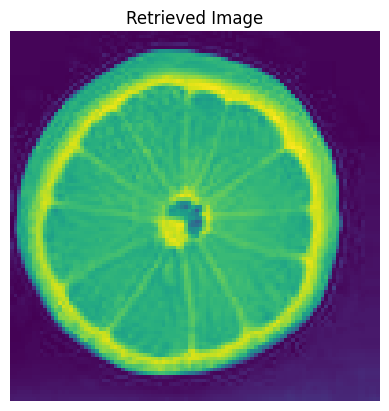

In [36]:
# Check if T is a square matrix
if T.shape[0] == T.shape[1]:
    print("Matrix T is a square matrix.")
    # Compute the determinant of T
    determinant_T = np.linalg.det(T)
    # Check if the determinant is nonzero (T is invertible)
    if determinant_T != 0:
        print("Matrix T is invertible.")
        # Compute the inverse of T
        Tinv = np.linalg.inv(T)
        # Perform the inverse scrambling operation
        retrieved_image = Tinv.dot(transformed_image)
        # Plot the retrieved image
        plt.imshow(retrieved_image)  
        plt.title("Retrieved Image")
        plt.axis('off')
        plt.show()
    else:
        print("Matrix T is not invertible (determinant is zero).")
else:
    print("Matrix T is not a square matrix.")


## Result 
1. To know that the T matrix is invertible we need to verify first that the T matrix is a square matrix and T to be inversitble the determinant of T matrix should not be zero
2. To inverse the matrix T we use np.linalg.inv() function and with this Tinv matrix if we multiply to the transformed image it gives us the original image and Tinv and T dot product will be one
3. Therefore, we get the original image i.e; img_average_chanbel

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


Identity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Random Column from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Shuffled Column Indices:
[67 37 61 63  2 39 99 43 74  3  1 92 81 12 49 14 13 15 87 26 48 86 24 90
 18 64 88 42 32 72 52  5 31  0 56 11 95 77 47  8  4 68 36 79 75 45 57 58
 93 29 30 83 44  7 33 94 22 73 82 40 69 23 89 78 98 80 76 20 62 10 35 97
 28 25 17 53 84 27 70 54 71 21 38 91 96  9 16 55 19 51 59 60 66  6 46 50
 65 34 85 41]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.

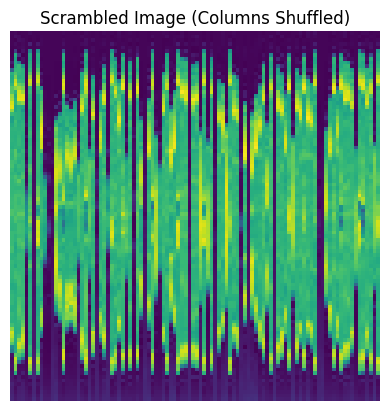

In [37]:
# Print a random column from identity_matrix
random_col_index = np.random.randint(0, columns)
random_col = identity_matrix[:, random_col_index]

print("Identity Matrix:")
print(identity_matrix)
print("\nRandom Column from Identity Matrix:")
print(random_col)

# Create an array containing column indices
cols = np.arange(columns)

# Shuffle the column indices
np.random.shuffle(cols)

# Print the shuffled column indices
print("Shuffled Column Indices:")
print(cols)

# Create a new matrix T_cols from identity_matrix with shuffled columns
T_cols = identity_matrix[:, cols]

print(T_cols)
# Check the shape of T_cols
print("Shape of T_cols:", T_cols.shape)

# If needed, reshape T_cols to have the same size as identity_matrix and img_average_channel
if T_cols.shape != identity_matrix.shape:
    T_cols = T_cols.reshape(identity_matrix.shape)

# Sanity check: Ensure that T_cols has the same size as identity_matrix and img_average_channel
assert T_cols.shape == identity_matrix.shape == img_average_channel.shape

print("Shape of T_cols after reshaping:", T_cols.shape)

# Perform matrix multiplication between img_average_channel and T_cols to scramble columns
scrambled_image_cols = img_average_channel.dot(T_cols)

# Check the shape of the result
print("Shape of scrambled_image_cols:", scrambled_image_cols.shape)

# Plot the scrambled image with columns rearranged
plt.imshow(scrambled_image_cols) 
plt.title("Scrambled Image (Columns Shuffled)")
plt.axis('off')
plt.show()

## Result
1. Here we have applied the same logic as above and th tranformed image is with shuffled columns
2. Below also, we are doing same but for both rows and columns and retrieving the original image with the inverse.

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

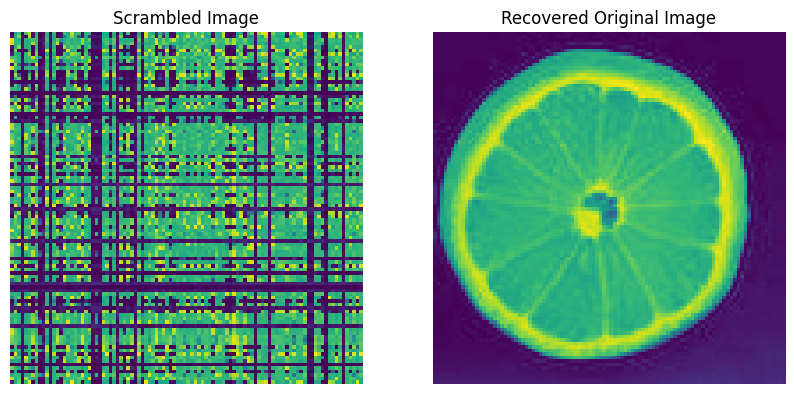

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming img_average_channel is a NumPy array
num_rows, num_columns = img_average_channel.shape

# Shuffle the row indices
row_indices = np.arange(num_rows)
np.random.shuffle(row_indices)

# Shuffle the column indices
col_indices = np.arange(num_columns)
np.random.shuffle(col_indices)

# Create identity matrices of the same size as img_average_channel's rows and columns
identity_matrix_rows = np.eye(num_rows)
identity_matrix_cols = np.eye(num_columns)

# Use shuffled row and column indices to rearrange the rows and columns
T_rows = identity_matrix_rows[row_indices]
T_cols = identity_matrix_cols[:, col_indices]

# Scramble both rows and columns of the original image
scrambled_image = np.dot(np.dot(T_rows, img_average_channel), T_cols)

# Plot the scrambled image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(scrambled_image)
plt.axis('off')
plt.title("Scrambled Image")

# Invert the operations to recover the original image
T_rows_inv = np.linalg.inv(T_rows)
T_cols_inv = np.linalg.inv(T_cols)

# Perform matrix multiplication with the inverse operations
recovered_image = np.dot(np.dot(T_rows_inv, scrambled_image), T_cols_inv)

# Plot the recovered original image
plt.subplot(1, 2, 2)
plt.imshow(recovered_image)
plt.title("Recovered Original Image")
plt.axis('off')
plt.show()
